In [1]:
fileprefix = 'diverse'

In [2]:
#!/usr/bin/env python
import openeye.oechem as oechem
import openeye.oedepict as oedepict
from IPython.display import display

In [3]:
def depict(inpmol, width=500, height=200):
    mol = oechem.OEGraphMol(inpmol)
    from IPython.display import Image
    dopt = oedepict.OEPrepareDepictionOptions()
    dopt.SetDepictOrientation( oedepict.OEDepictOrientation_Horizontal)
    oedepict.OEPrepareDepiction(mol, dopt)
    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    disp = oedepict.OE2DMolDisplay(mol, opts)
    ofs = oechem.oeosstream()
    oedepict.OERenderMolecule(ofs, 'png', disp)
    ofs.flush()
    return Image(data = "".join(ofs.str()))

### Generate PSI4 input

In [4]:
ifs = oechem.oemolistream()
ifs.SetConfTest( oechem.OEAbsoluteConfTest() )
if not ifs.open(fileprefix+'.smi'):
    oechem.OEThrow.Warning("Unable to open %s for reading" % fileprefix+'_confs'+outputFormat)

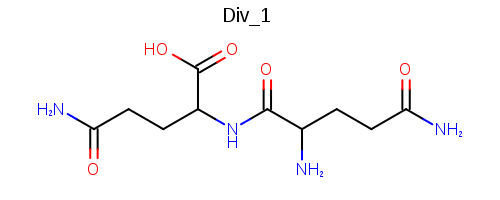

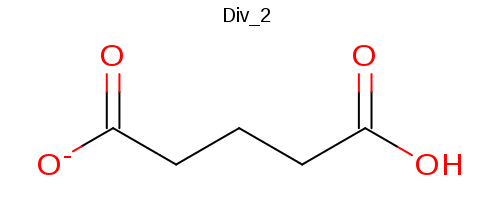

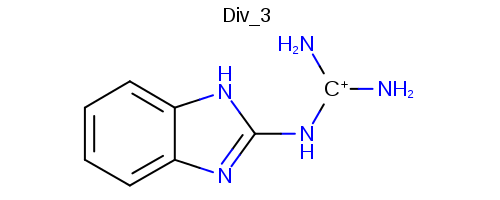

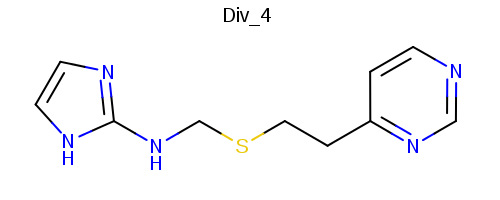

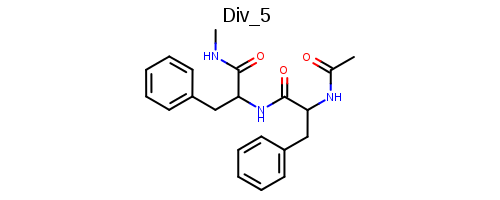

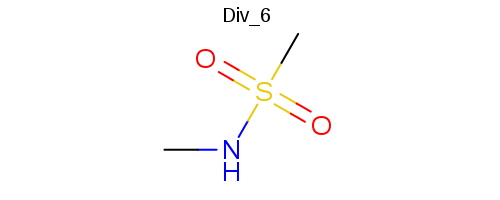

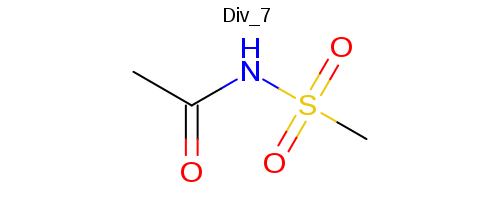

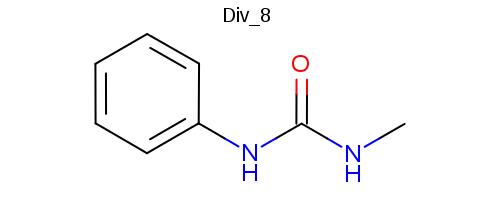

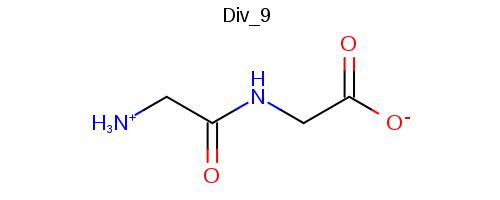

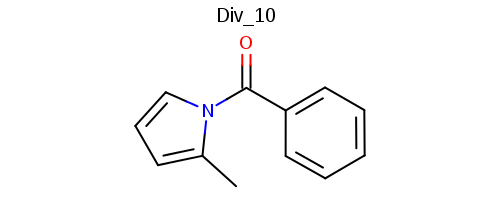

In [5]:
for mol in ifs.GetOEMols():
    display( depict(mol) )

In [6]:
ifs.close()